In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from kneed import KneeLocator

In [5]:
data = pd.read_csv("./datasets/epaa_dataset_2.csv")

subjects = data["Subject"]

data.drop("Subject", axis=1, inplace=True)
data.drop("Unknown", axis=1, inplace=True)

y = data["Activity"]

data.drop("Activity", axis=1, inplace=True)

X = data[data.columns.to_list()]

X.head()

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,7.609005,7.322882,7.281458,7.753253,8.043099,8.215854,8.388745,8.578034,8.658356,8.670648,...,-6.372120,-6.323450,-6.474440,-6.449742,-6.415010,-6.514918,-6.590504,-6.535514,-6.453252,-6.182647
1,8.507709,8.480922,8.747757,8.863954,8.863968,8.458413,7.782317,7.412026,7.589061,7.709209,...,-6.785400,-6.583993,-6.291560,-6.472510,-6.626783,-6.774500,-6.929722,-6.846734,-6.704524,-6.513264
2,8.442040,8.632098,8.730012,8.697698,8.552650,8.057508,0.395888,-0.090756,-0.335575,-0.507582,...,-6.403487,-6.450791,-6.612762,-6.830472,-6.872514,-7.249798,-7.414935,-7.278581,-7.127102,-6.832014
3,-11.025566,-11.714652,-11.765208,-9.944634,-7.660169,-6.882160,-7.601299,-9.161294,-10.339050,-11.046978,...,-7.715563,-7.764263,-7.755619,-8.040819,-8.091955,-7.817943,-7.768974,-7.687118,-7.795514,-7.819323
4,0.238472,0.321549,0.383802,0.495767,0.664556,0.776264,1.019609,1.010645,0.850412,0.473916,...,-7.614920,-7.553618,-7.381002,-7.324491,-7.473060,-7.441543,-7.546224,-7.474858,-7.441730,-7.412475


In [7]:
max_depth = 15
n_repeats = 30
k_folds = 10

k = np.zeros(max_depth)
k_testing_acc = np.zeros(max_depth)

for i in range(1,max_depth+1):
    k[i-1] = i
    print("NN",i)
    cv = RepeatedKFold(n_splits=k_folds, n_repeats=n_repeats, random_state=0)
    # create model
    model = DecisionTreeClassifier(max_depth=i,criterion='entropy')
    # evaluate model
    acc = cross_val_score(model, X, y, scoring=metrics.make_scorer(metrics.accuracy_score), cv=cv, n_jobs=-1)
    # report performance
    k_testing_acc[i-1] = acc.mean()

NN 1
NN 2
NN 3
NN 4
NN 5
NN 6
NN 7
NN 8
NN 9
NN 10
NN 11
NN 12
NN 13
NN 14
NN 15


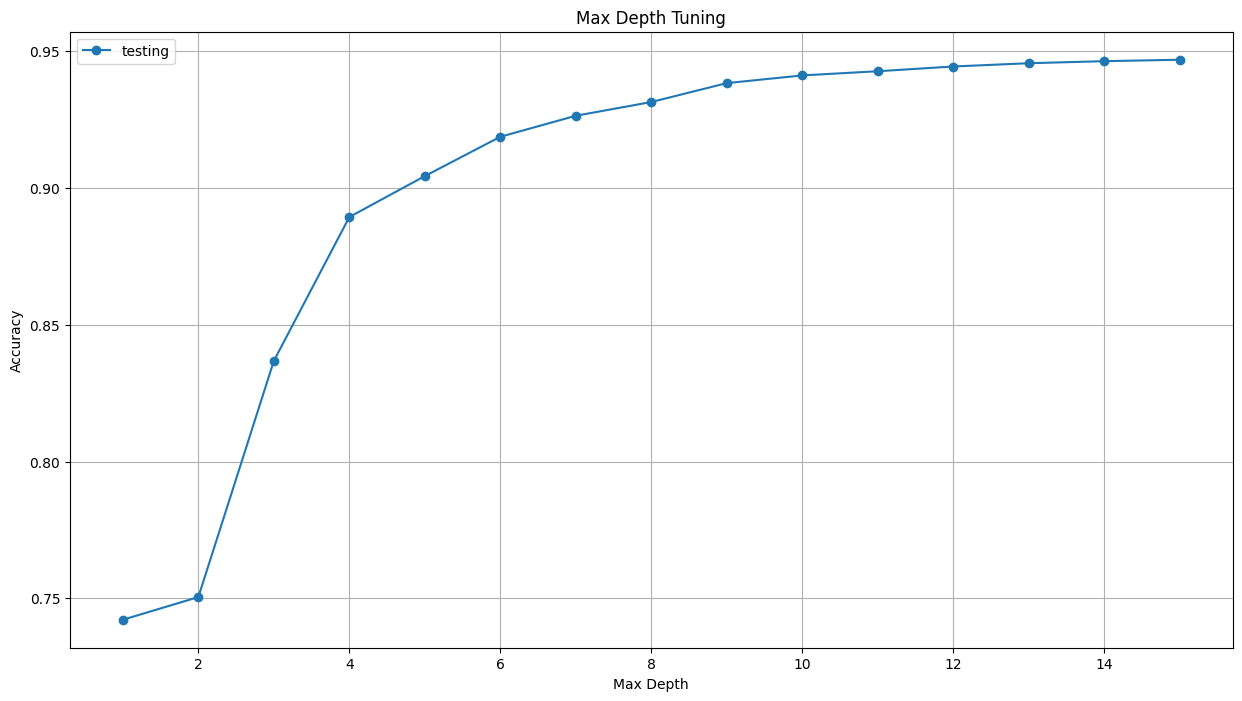

5


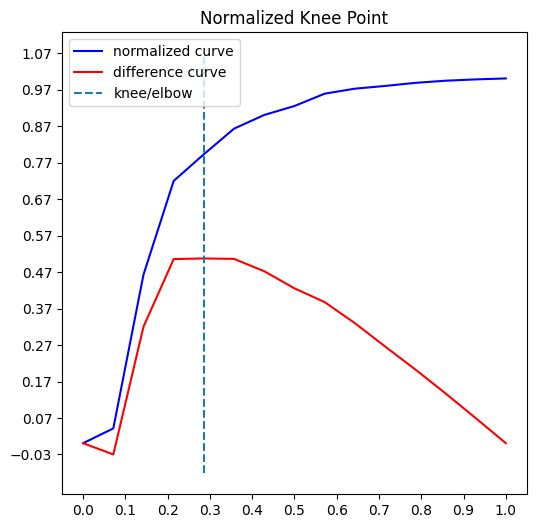

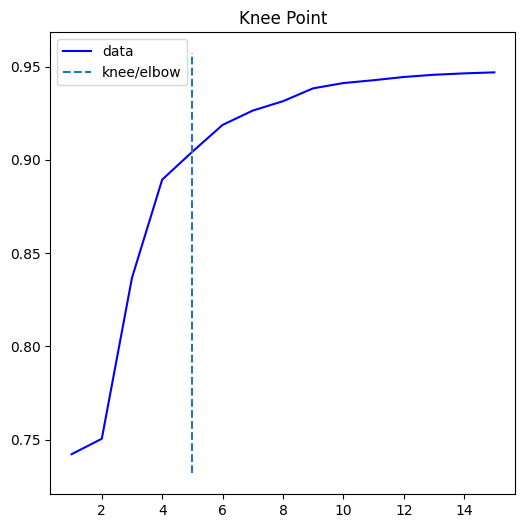

In [9]:
# Acc plot
plt.figure(figsize=(15,8))
plt.plot(k, k_testing_acc, '-o', label="testing")
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid()
plt.title("Max Depth Tuning")
plt.show()

max_depth_list=list(range(1, 16))

kneedle = KneeLocator(max_depth_list, k_testing_acc.tolist(), S=1.0, curve="concave", direction="increasing")

print(round(kneedle.knee, 3))
kneedle.plot_knee_normalized()
kneedle.plot_knee()

In [5]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.1)

model = DecisionTreeClassifier(max_depth=20,criterion='entropy', random_state=0)
model.fit(X_train,y_train)

y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model.score(X_test,y_test))
print(metrics.accuracy_score(y_test,y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))
print(metrics.f1_score(y_test, y_test_hat, average=None))
print(metrics.classification_report(y_test, y_test_hat))

0.7781497261107729
0.7781497261107729
[[247   4  13   5  10]
 [  2 393  36  48  65]
 [  7  36 731  51  60]
 [  4  39  48 297  88]
 [  8  58  51  96 889]]
[0.90310786 0.73184358 0.82879819 0.61048304 0.80307136]
              precision    recall  f1-score   support

   OPTY_A_01       0.92      0.89      0.90       279
   OPTY_A_02       0.74      0.72      0.73       544
   OPTY_A_03       0.83      0.83      0.83       885
   OPTY_A_04       0.60      0.62      0.61       476
   OPTY_A_05       0.80      0.81      0.80      1102

    accuracy                           0.78      3286
   macro avg       0.78      0.77      0.78      3286
weighted avg       0.78      0.78      0.78      3286


In [8]:
from pandas.core.generic import RandomState
X_train, X_test, y_train , y_test = train_test_split(x,y,test_size=0.1, random_state=8)

model = DecisionTreeClassifier(max_depth=10,criterion='entropy')
model.fit(X_train,y_train)

y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model.score(X_test,y_test))
print(metrics.accuracy_score(y_test,y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))
print(metrics.f1_score(y_test, y_test_hat, average=None))
print(metrics.classification_report(y_test, y_test_hat))

0.8677824267782427
0.8677824267782427
[[ 51   2   0   0   4]
 [  2  27  55   2   0]
 [  0  26 747   7   1]
 [  2   3   2 141  20]
 [  0   6   7  19  71]]
[0.91071429 0.36       0.93844221 0.83679525 0.71356784]
              precision    recall  f1-score   support

   WHF_Act11       0.93      0.89      0.91        57
   WHF_Act12       0.42      0.31      0.36        86
   WHF_Act14       0.92      0.96      0.94       781
    WHF_Act2       0.83      0.84      0.84       168
    WHF_Act4       0.74      0.69      0.71       103

    accuracy                           0.87      1195
   macro avg       0.77      0.74      0.75      1195
weighted avg       0.86      0.87      0.86      1195


[Text(0.520065961337513, 0.95, 'x[3] <= -4.203\nentropy = 1.615\nsamples = 11947\nvalue = [539, 1032, 7707, 1604, 1065]'),
 Text(0.24562434691745036, 0.85, 'x[8] <= 1.576\nentropy = 0.517\nsamples = 7870\nvalue = [0, 731, 7076, 11, 52]'),
 Text(0.0973092998955068, 0.75, 'x[1] <= 0.934\nentropy = 0.716\nsamples = 3017\nvalue = [0, 482, 2503, 0, 32]'),
 Text(0.04323406478578892, 0.65, 'x[19] <= 5.37\nentropy = 1.027\nsamples = 458\nvalue = [0, 149, 301, 0, 8]'),
 Text(0.023772204806687566, 0.55, 'x[8] <= 0.292\nentropy = 0.911\nsamples = 445\nvalue = [0, 145, 300, 0, 0]'),
 Text(0.006269592476489028, 0.45, 'x[12] <= -13.892\nentropy = 0.979\nsamples = 89\nvalue = [0, 52, 37, 0, 0]'),
 Text(0.0041797283176593526, 0.35, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]'),
 Text(0.008359456635318705, 0.35, 'x[15] <= 2.875\nentropy = 0.992\nsamples = 83\nvalue = [0, 46, 37, 0, 0]'),
 Text(0.0041797283176593526, 0.25, 'x[1] <= -0.934\nentropy = 1.0\nsamples = 73\nvalue = [0, 37, 36, 0, 0]'

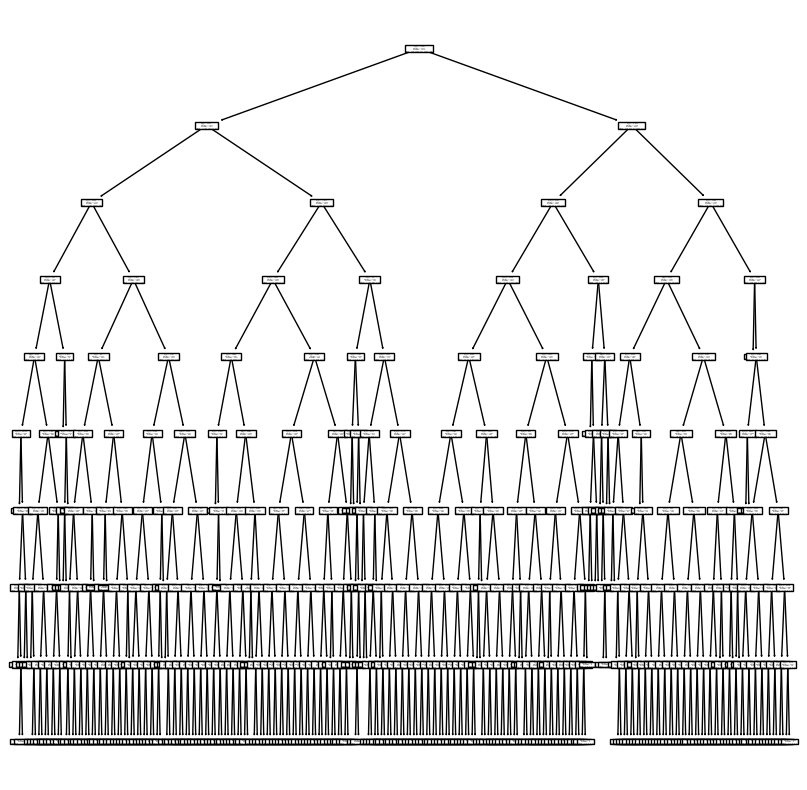

In [4]:
dt_classifier = DecisionTreeClassifier(max_depth=9,criterion='entropy')
dt_classifier.fit(x,y)

y_hat = dt_classifier.predict(x)

plt.figure(figsize=(10,10))
tree.plot_tree(dt_classifier)

In [6]:
print(dt_classifier.score(x,y))
print(metrics.accuracy_score(y,y_hat))
print(metrics.confusion_matrix(y, y_hat))
print(metrics.f1_score(y, y_hat, average=None))
print(metrics.classification_report(y, y_hat))

0.9057503975893529
0.9057503975893529
[[ 468   14    4   20   33]
 [  34  476  447   46   29]
 [   0   91 7577   35    4]
 [   4   15   22 1452  111]
 [   6   25   14  172  848]]
[0.8905804  0.57592257 0.96087756 0.87233403 0.81148325]
              precision    recall  f1-score   support

   WHF_Act11       0.91      0.87      0.89       539
   WHF_Act12       0.77      0.46      0.58      1032
   WHF_Act14       0.94      0.98      0.96      7707
    WHF_Act2       0.84      0.91      0.87      1604
    WHF_Act4       0.83      0.80      0.81      1065

    accuracy                           0.91     11947
   macro avg       0.86      0.80      0.82     11947
weighted avg       0.90      0.91      0.90     11947
